In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">1</a>.''')

In [6]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import numpy as np

def initGrid(ax, x, y):
    ax.set_aspect(1)
    xlabels = [str(i) for i in np.arange(0, x, 1)]
    ylabels = [str(i) for i in np.arange(0, y, 1)]
    xlocs = np.arange(len(xlabels))
    ax.xaxis.set_ticks(xlocs + 0.5, minor=True)
    ax.xaxis.set(ticks=xlocs, ticklabels=xlabels)
    ylocs = np.arange(len(ylabels))
    ax.yaxis.set_ticks(ylocs + 0.5, minor=True)
    ax.yaxis.set(ticks=ylocs, ticklabels=ylabels)
    ax.grid(True, which='minor')
    ax.set_xlim(-0.5, x - 0.5)
    ax.set_ylim(-0.5, y - 0.5)

# Improved Box Blur Algorithm

1. Improved Algorithm
2. Parallelized with OpenMP
3. Parallelized with MPI
4. Parallelized with MPI+OpenMP(OpenACC)

# Improved Algorithm

### Blur in x and y direction independently which changes complexity to
$$\mathcal{O}(nmr^2) \rightarrow \mathcal{O}(2nmr)$$
### where $n$ and $m$ are the width and height respectively and $r$ is the lenght of the light green area.

<IPython.core.display.Javascript object>


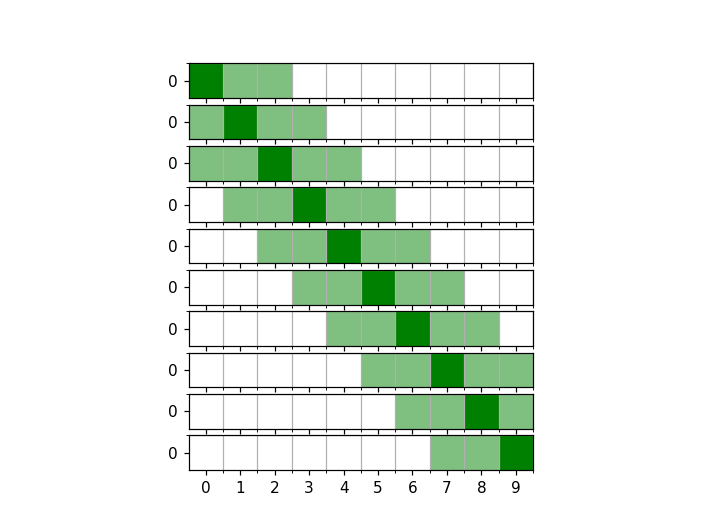

In [7]:
%matplotlib nbagg

def stepsX(ax, x, y, r):
    ax.add_patch(pat.Rectangle((x - r - 0.5,y - 0.5), 2 * r + 1, 1, fill=True, alpha=0.5, fc="green"))
    ax.add_patch(pat.Rectangle((x - 0.5,y - 0.5), 1, 1, fill=True, alpha=1, fc="green"));
    
def stepsY(ax, x, y, r):
    ax.add_patch(pat.Rectangle((x - 0.5, y - r - 0.5), 1, 2 * r + 1, fill=True, alpha=0.5, fc="green"))
    ax.add_patch(pat.Rectangle((x - 0.5,y - 0.5), 1, 1, fill=True, alpha=1, fc="green"));


nsteps = 10
r = 2

fig, ax = plt.subplots(nsteps, 1)
for i in range(nsteps):
    initGrid(ax[i], nsteps, 1)
    stepsX(ax[i], i, 0, r)
#plt.tight_layout()

# OpenMP implementation

<IPython.core.display.Javascript object>


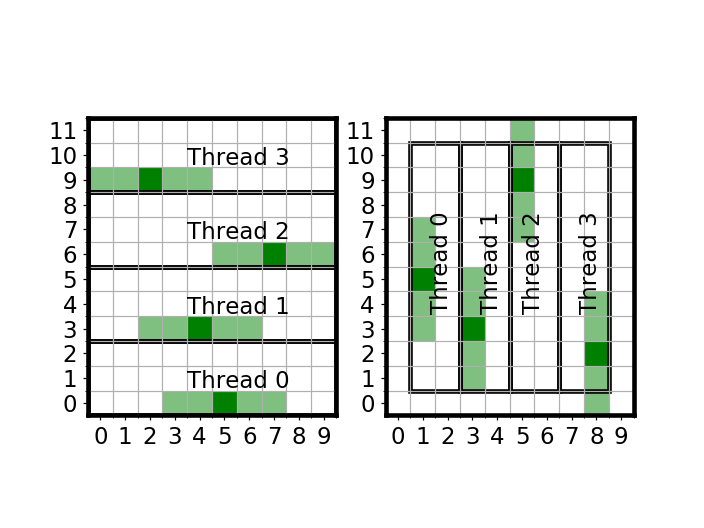

In [52]:
%matplotlib nbagg

width = 10
height = 12
r = 2

fig, (ax1, ax2) = plt.subplots(1, 2)
initGrid(ax1, width, height)
initGrid(ax2, width, height)

stepsX(ax1, 5, 0, r)
stepsX(ax1, 4, 3, r)
stepsX(ax1, 7, 6, r)
stepsX(ax1, 2, 9, r)

ax1.add_patch(pat.Rectangle((-0.5,-0.5), width, 3, fill=False, ec="black", lw=3))
ax1.add_patch(pat.Rectangle((-0.5,2.5), width, 3, fill=False, ec="black", lw=3))
ax1.add_patch(pat.Rectangle((-0.5,5.5), width, 3, fill=False, ec="black", lw=3))
ax1.add_patch(pat.Rectangle((-0.5,8.5), width, 3, fill=False, ec="black", lw=3))

ax1.text(3.5, 0.6, "Thread 0", fontsize=15, color="black")
ax1.text(3.5, 3.6, "Thread 1", fontsize=15, color="black")
ax1.text(3.5, 6.6, "Thread 2", fontsize=15, color="black")
ax1.text(3.5, 9.6, "Thread 3", fontsize=15, color="black");


stepsY(ax2, 1, 5, r)
stepsY(ax2, 3, 3, r)
stepsY(ax2, 5, 9, r)
stepsY(ax2, 8, 2, r)

ax2.add_patch(pat.Rectangle((0.5,0.5), 2, height - 2, fill=False, lw=3, ec="black"))
ax2.add_patch(pat.Rectangle((2.5,0.5), 2, height - 2, fill=False, lw=3, ec="black"))
ax2.add_patch(pat.Rectangle((4.5,0.5), 2, height - 2, fill=False, lw=3, ec="black"))
ax2.add_patch(pat.Rectangle((6.5,0.5), 2, height - 2, fill=False, lw=3, ec="black"))

ax2.text(1.3, 7, "Thread 0", fontsize=15, color="black", rotation=90)
ax2.text(3.3, 7, "Thread 1", fontsize=15, color="black", rotation=90)
ax2.text(5, 7, "Thread 2", fontsize=15, color="black", rotation=90)
ax2.text(7.3, 7, "Thread 3", fontsize=15, color="black", rotation=90);

# OpenMP Implementation
#### Time measurement with the use of 1 to 32 logical threads. For each point the standard deviation was calculated through 10 runs.

<IPython.core.display.Javascript object>


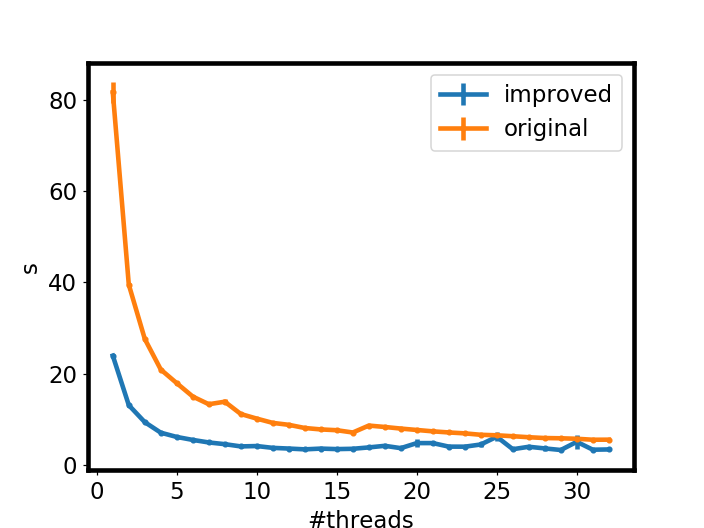

In [80]:
%matplotlib nbagg
import pandas as pd

df = pd.read_hdf("omp.hdf5", "TotTimes")
df2 = pd.read_hdf("omp_original.hdf5", "TotTimes")
plt.errorbar(df.threads, df.time, df.error, marker='.', lw=3, label="improved")
plt.errorbar(df2.threads, df2.time, df2.error, marker='.', lw=3, label="original")
plt.rc('axes', linewidth=3)
plt.rcParams.update({'font.size': 15})
plt.ylabel("s")
plt.legend()
plt.xlabel("#threads");

# MPI Implementation
#### Node configuration for rows and columns

<IPython.core.display.Javascript object>


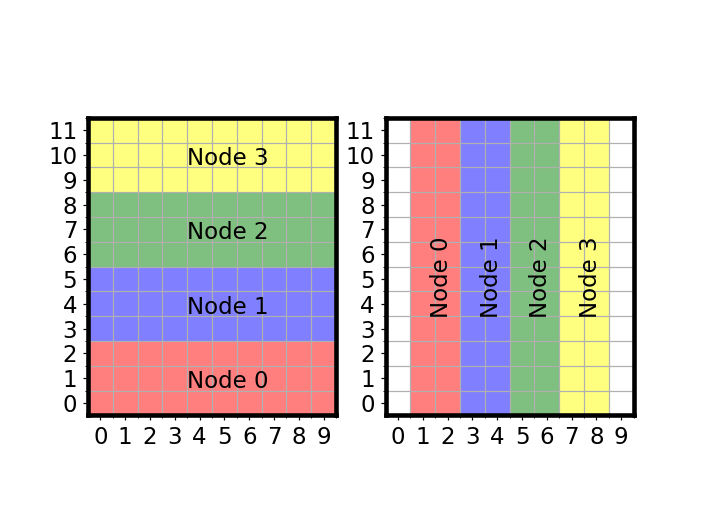

In [25]:
%matplotlib nbagg

width = 10
height = 12
r = 2
fig, (ax1, ax2) = plt.subplots(1, 2)
initGrid(ax1, width, height)
initGrid(ax2, width, height)

ax1.add_patch(pat.Rectangle((-0.5,-0.5), width, 3, fill=True, alpha=0.5, fc="red"))
ax1.text(3.5, 0.6, "Node 0", fontsize=15, color="black")
ax1.add_patch(pat.Rectangle((-0.5,2.5), width, 3, fill=True, alpha=0.5, fc="blue"))
ax1.text(3.5, 3.6, "Node 1", fontsize=15, color="black")
ax1.add_patch(pat.Rectangle((-0.5,5.5), width, 3, fill=True, alpha=0.5, fc="green"))
ax1.text(3.5, 6.6, "Node 2", fontsize=15, color="black")
ax1.add_patch(pat.Rectangle((-0.5,8.5), width, 3, fill=True, alpha=0.5, fc="yellow"))
ax1.text(3.5, 9.6, "Node 3", fontsize=15, color="black");

ax2.add_patch(pat.Rectangle((0.5,-0.5), 2, height, fill=True, alpha=0.5, fc="red"))
ax2.add_patch(pat.Rectangle((2.5,-0.5), 2, height, fill=True, alpha=0.5, fc="blue"))
ax2.add_patch(pat.Rectangle((4.5,-0.5), 2, height, fill=True, alpha=0.5, fc="green"))
ax2.add_patch(pat.Rectangle((6.5,-0.5), 2, height, fill=True, alpha=0.5, fc="yellow"))

ax2.text(1.3, 6, "Node 0", fontsize=15, color="black", rotation=90)
ax2.text(3.3, 6, "Node 1", fontsize=15, color="black", rotation=90)
ax2.text(5.3, 6, "Node 2", fontsize=15, color="black", rotation=90)
ax2.text(7.3, 6, "Node 3", fontsize=15, color="black", rotation=90);


# MPI Implementation
 1. Each node smooths along x-direction and save it as column major layout
 2. Each node scatters column memory blocks to all other nodes

<IPython.core.display.Javascript object>


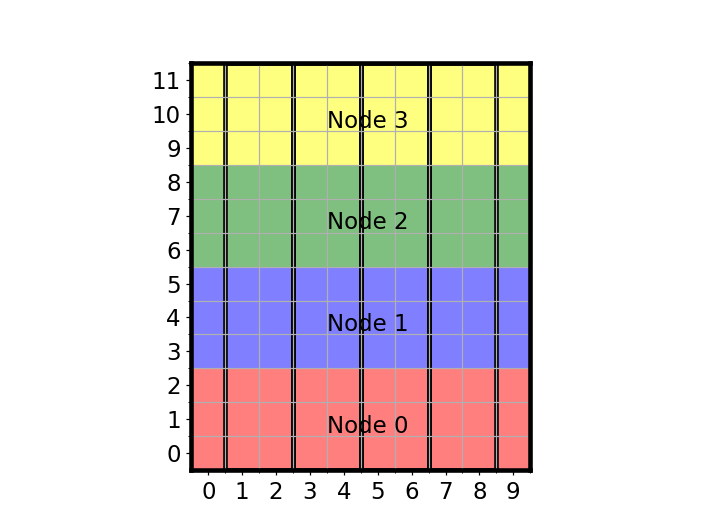

In [48]:
%matplotlib nbagg

width = 10
height = 12
r = 2
fig, ax2 = plt.subplots(1, 1)
initGrid(ax2, width, height)

ax2.add_patch(pat.Rectangle((-0.5,-0.5), width, 3, fill=True, alpha=0.5, fc="red"))
ax2.text(3.5, 0.6, "Node 0", fontsize=15, color="black")
ax2.add_patch(pat.Rectangle((-0.5,2.5), width, 3, fill=True, alpha=0.5, fc="blue"))
ax2.text(3.5, 3.6, "Node 1", fontsize=15, color="black")
ax2.add_patch(pat.Rectangle((-0.5,5.5), width, 3, fill=True, alpha=0.5, fc="green"))
ax2.text(3.5, 6.6, "Node 2", fontsize=15, color="black")
ax2.add_patch(pat.Rectangle((-0.5,8.5), width, 3, fill=True, alpha=0.5, fc="yellow"))
ax2.text(3.5, 9.6, "Node 3", fontsize=15, color="black")

ax2.add_patch(pat.Rectangle((0.5,-0.5), 2, 12, fill=False, ec="black", lw=3))
ax2.add_patch(pat.Rectangle((2.5,-0.5), 2, 12, fill=False, ec="black", lw=3))
ax2.add_patch(pat.Rectangle((4.5,-0.5), 2, 12, fill=False, ec="black", lw=3))
ax2.add_patch(pat.Rectangle((6.5,-0.5), 2, 12, fill=False, ec="black", lw=3));

# MPI Implementation
#### Reorder memory for smoothing in y-direction

<IPython.core.display.Javascript object>


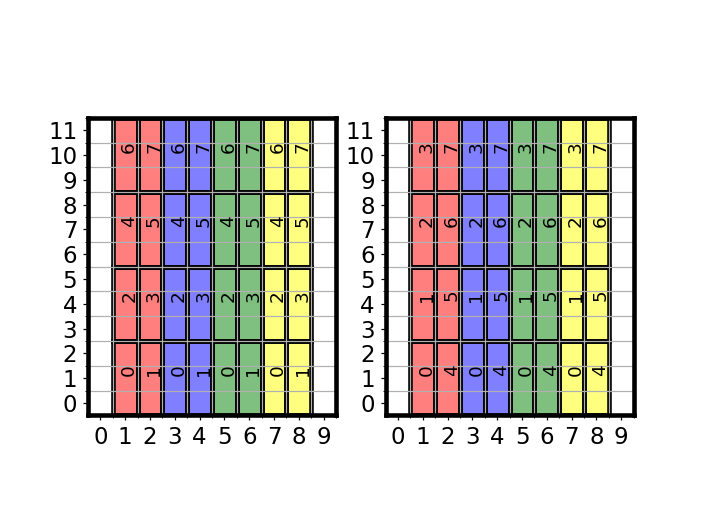

In [47]:
%matplotlib nbagg

width = 10
height = 12
r = 2
fig, (ax1, ax2) = plt.subplots(1, 2)
initGrid(ax1, width, height)
initGrid(ax2, width, height)

def drawMem(ax):

    ax.add_patch(pat.Rectangle((0.5,-0.5), 2, height, fill=True, alpha=0.5, fc="red"))
    ax.add_patch(pat.Rectangle((2.5,-0.5), 2, height, fill=True, alpha=0.5, fc="blue"))
    ax.add_patch(pat.Rectangle((4.5,-0.5), 2, height, fill=True, alpha=0.5, fc="green"))
    ax.add_patch(pat.Rectangle((6.5,-0.5), 2, height, fill=True, alpha=0.5, fc="yellow"))

    ax.add_patch(pat.Rectangle((0.5,-0.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((1.5,-0.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((2.5,-0.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((3.5,-0.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((4.5,-0.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((5.5,-0.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((6.5,-0.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((7.5,-0.5), 1, 3, fill=False, ec="black", lw=3))

    ax.add_patch(pat.Rectangle((0.5,2.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((1.5,2.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((2.5,2.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((3.5,2.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((4.5,2.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((5.5,2.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((6.5,2.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((7.5,2.5), 1, 3, fill=False, ec="black", lw=3))

    ax.add_patch(pat.Rectangle((0.5,5.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((1.5,5.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((2.5,5.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((3.5,5.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((4.5,5.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((5.5,5.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((6.5,5.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((7.5,5.5), 1, 3, fill=False, ec="black", lw=3))

    ax.add_patch(pat.Rectangle((0.5,8.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((1.5,8.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((2.5,8.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((3.5,8.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((4.5,8.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((5.5,8.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((6.5,8.5), 1, 3, fill=False, ec="black", lw=3))
    ax.add_patch(pat.Rectangle((7.5,8.5), 1, 3, fill=False, ec="black", lw=3))
    
drawMem(ax1)
drawMem(ax2)

ax1.text(0.8, 1, "0", fontsize=12, color="black", rotation=90)
ax1.text(1.8, 1, "1", fontsize=12, color="black", rotation=90)
ax1.text(2.8, 1, "0", fontsize=12, color="black", rotation=90)
ax1.text(3.8, 1, "1", fontsize=12, color="black", rotation=90)
ax1.text(4.8, 1, "0", fontsize=12, color="black", rotation=90)
ax1.text(5.8, 1, "1", fontsize=12, color="black", rotation=90)
ax1.text(6.8, 1, "0", fontsize=12, color="black", rotation=90)
ax1.text(7.8, 1, "1", fontsize=12, color="black", rotation=90)

ax1.text(0.8, 4, "2", fontsize=12, color="black", rotation=90)
ax1.text(1.8, 4, "3", fontsize=12, color="black", rotation=90)
ax1.text(2.8, 4, "2", fontsize=12, color="black", rotation=90)
ax1.text(3.8, 4, "3", fontsize=12, color="black", rotation=90)
ax1.text(4.8, 4, "2", fontsize=12, color="black", rotation=90)
ax1.text(5.8, 4, "3", fontsize=12, color="black", rotation=90)
ax1.text(6.8, 4, "2", fontsize=12, color="black", rotation=90)
ax1.text(7.8, 4, "3", fontsize=12, color="black", rotation=90)

ax1.text(0.8, 7, "4", fontsize=12, color="black", rotation=90)
ax1.text(1.8, 7, "5", fontsize=12, color="black", rotation=90)
ax1.text(2.8, 7, "4", fontsize=12, color="black", rotation=90)
ax1.text(3.8, 7, "5", fontsize=12, color="black", rotation=90)
ax1.text(4.8, 7, "4", fontsize=12, color="black", rotation=90)
ax1.text(5.8, 7, "5", fontsize=12, color="black", rotation=90)
ax1.text(6.8, 7, "4", fontsize=12, color="black", rotation=90)
ax1.text(7.8, 7, "5", fontsize=12, color="black", rotation=90)

ax1.text(0.8, 10, "6", fontsize=12, color="black", rotation=90)
ax1.text(1.8, 10, "7", fontsize=12, color="black", rotation=90)
ax1.text(2.8, 10, "6", fontsize=12, color="black", rotation=90)
ax1.text(3.8, 10, "7", fontsize=12, color="black", rotation=90)
ax1.text(4.8, 10, "6", fontsize=12, color="black", rotation=90)
ax1.text(5.8, 10, "7", fontsize=12, color="black", rotation=90)
ax1.text(6.8, 10, "6", fontsize=12, color="black", rotation=90)
ax1.text(7.8, 10, "7", fontsize=12, color="black", rotation=90)



ax2.text(0.8, 1, "0", fontsize=12, color="black", rotation=90)
ax2.text(1.8, 1, "4", fontsize=12, color="black", rotation=90)
ax2.text(2.8, 1, "0", fontsize=12, color="black", rotation=90)
ax2.text(3.8, 1, "4", fontsize=12, color="black", rotation=90)
ax2.text(4.8, 1, "0", fontsize=12, color="black", rotation=90)
ax2.text(5.8, 1, "4", fontsize=12, color="black", rotation=90)
ax2.text(6.8, 1, "0", fontsize=12, color="black", rotation=90)
ax2.text(7.8, 1, "4", fontsize=12, color="black", rotation=90)

ax2.text(0.8, 4, "1", fontsize=12, color="black", rotation=90)
ax2.text(1.8, 4, "5", fontsize=12, color="black", rotation=90)
ax2.text(2.8, 4, "1", fontsize=12, color="black", rotation=90)
ax2.text(3.8, 4, "5", fontsize=12, color="black", rotation=90)
ax2.text(4.8, 4, "1", fontsize=12, color="black", rotation=90)
ax2.text(5.8, 4, "5", fontsize=12, color="black", rotation=90)
ax2.text(6.8, 4, "1", fontsize=12, color="black", rotation=90)
ax2.text(7.8, 4, "5", fontsize=12, color="black", rotation=90)

ax2.text(0.8, 7, "2", fontsize=12, color="black", rotation=90)
ax2.text(1.8, 7, "6", fontsize=12, color="black", rotation=90)
ax2.text(2.8, 7, "2", fontsize=12, color="black", rotation=90)
ax2.text(3.8, 7, "6", fontsize=12, color="black", rotation=90)
ax2.text(4.8, 7, "2", fontsize=12, color="black", rotation=90)
ax2.text(5.8, 7, "6", fontsize=12, color="black", rotation=90)
ax2.text(6.8, 7, "2", fontsize=12, color="black", rotation=90)
ax2.text(7.8, 7, "6", fontsize=12, color="black", rotation=90)

ax2.text(0.8, 10, "3", fontsize=12, color="black", rotation=90)
ax2.text(1.8, 10, "7", fontsize=12, color="black", rotation=90)
ax2.text(2.8, 10, "3", fontsize=12, color="black", rotation=90)
ax2.text(3.8, 10, "7", fontsize=12, color="black", rotation=90)
ax2.text(4.8, 10, "3", fontsize=12, color="black", rotation=90)
ax2.text(5.8, 10, "7", fontsize=12, color="black", rotation=90)
ax2.text(6.8, 10, "3", fontsize=12, color="black", rotation=90)
ax2.text(7.8, 10, "7", fontsize=12, color="black", rotation=90);

# MPI Implementation
1. Each node smooths along y-direction and saves it as row major layout
2. Each node gathers row memory blocks from all other nodes

<IPython.core.display.Javascript object>


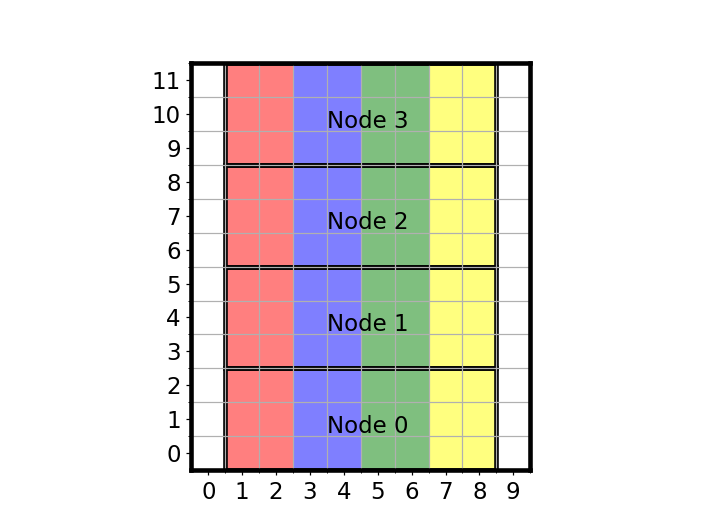

In [51]:
%matplotlib nbagg

width = 10
height = 12
r = 2

fig, ax1 = plt.subplots(1, 1)
initGrid(ax1, width, height)
ax1.add_patch(pat.Rectangle((0.5,-0.5), 2, 12, fill=True, alpha=0.5, fc="red"))
ax1.add_patch(pat.Rectangle((2.5,-0.5), 2, 12, fill=True, alpha=0.5, fc="blue"))
ax1.add_patch(pat.Rectangle((4.5,-0.5), 2, 12, fill=True, alpha=0.5, fc="green"))
ax1.add_patch(pat.Rectangle((6.5,-0.5), 2, 12, fill=True, alpha=0.5, fc="yellow"))

ax1.add_patch(pat.Rectangle((0.5,-0.5), 8, 3, fill=False, ec="black", lw=3))
ax1.add_patch(pat.Rectangle((0.5,2.5), 8, 3, fill=False, ec="black", lw=3))
ax1.add_patch(pat.Rectangle((0.5,5.5), 8, 3, fill=False, ec="black", lw=3))
ax1.add_patch(pat.Rectangle((0.5,8.5), 8, 3, fill=False, ec="black", lw=3))

ax1.text(3.5, 0.6, "Node 0", fontsize=15, color="black")
ax1.text(3.5, 3.6, "Node 1", fontsize=15, color="black")
ax1.text(3.5, 6.6, "Node 2", fontsize=15, color="black")
ax1.text(3.5, 9.6, "Node 3", fontsize=15, color="black");

# MPI Implementation
#### Reorder memory for smoothing in x-direction

<IPython.core.display.Javascript object>


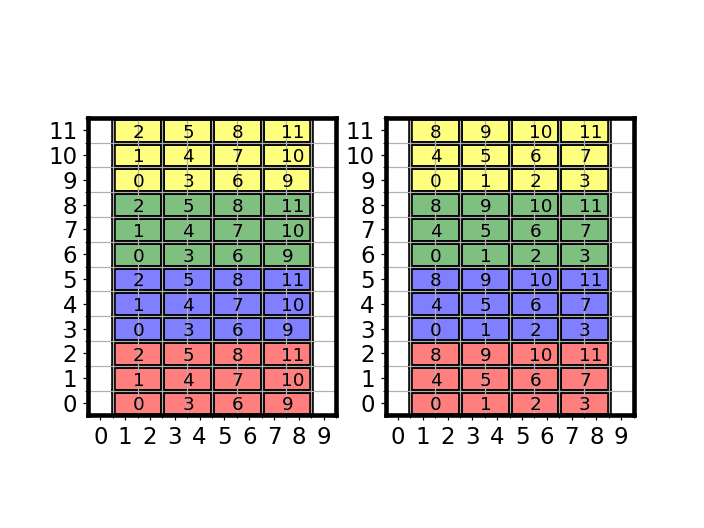

In [76]:
%matplotlib nbagg

width = 10
height = 12
r = 2

fig, (ax1, ax2) = plt.subplots(1, 2)
initGrid(ax1, width, height)
initGrid(ax2, width, height)

ax1.add_patch(pat.Rectangle((0.5,-0.5), width - 2, 3, fill=True, alpha=0.5, fc="red"))
ax1.add_patch(pat.Rectangle((0.5,2.5), width - 2, 3, fill=True, alpha=0.5, fc="blue"))
ax1.add_patch(pat.Rectangle((0.5,5.5), width - 2, 3, fill=True, alpha=0.5, fc="green"))
ax1.add_patch(pat.Rectangle((0.5,8.5), width - 2, 3, fill=True, alpha=0.5, fc="yellow"))

ax2.add_patch(pat.Rectangle((0.5,-0.5), width - 2, 3, fill=True, alpha=0.5, fc="red"))
ax2.add_patch(pat.Rectangle((0.5,2.5), width - 2, 3, fill=True, alpha=0.5, fc="blue"))
ax2.add_patch(pat.Rectangle((0.5,5.5), width - 2, 3, fill=True, alpha=0.5, fc="green"))
ax2.add_patch(pat.Rectangle((0.5,8.5), width - 2, 3, fill=True, alpha=0.5, fc="yellow"))

def mems(ax, xoff):
    for i in range(height):
        ax.add_patch(pat.Rectangle((xoff,-0.5 + i), 2, 1, fill=False, ec="black", lw=3))

mems(ax1, 0.5)
mems(ax1, 2.5)
mems(ax1, 4.5)
mems(ax1, 6.5)

mems(ax2, 0.5)
mems(ax2, 2.5)
mems(ax2, 4.5)
mems(ax2, 6.5)

def label1(ax, yoff):
    for x in range(4):
        for y in range(3):
            ax.text(1.3 + x * 2, yoff + y, str(3 * x + y), fontsize=12, color="black")
            
def label2(ax, yoff):
    for y in range(3):
        for x in range(4):
            ax.text(1.3 + x * 2, yoff + y, str(4 * y + x), fontsize=12, color="black")

label1(ax1, -0.3)
label1(ax1, 2.7)
label1(ax1, 5.7)
label1(ax1, 8.7)

label2(ax2, -0.3)
label2(ax2, 2.7)
label2(ax2, 5.7)
label2(ax2, 8.7)